# VacationPy
----

#### Note
* Keep an eye on your API usage. Use https://developers.google.com/maps/reporting/gmp-reporting as reference for how to monitor your usage and billing.

* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

# Import API key
from keys import g_key

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [14]:
#Load the csv exported in Part I to a DataFrame
output_data_file = "../output_data/cities.csv"
weather_data = pd.read_csv(output_data_file)

weather_data.drop(columns=["City_ID"]).sample(7)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
220,ust-tsilma,0,RU,1558378796,58,65.44,52.15,35.88,6.11
273,santa rosa,100,AR,1558378839,78,-36.62,-64.29,49.38,13.94
267,zaraza,97,VE,1558378836,22,9.35,-65.33,101.04,8.61
464,atasu,100,KZ,1558378884,52,48.68,71.64,55.32,12.21
165,norman wells,75,CA,1558378785,45,65.28,-126.83,66.20,6.93
143,yichun,89,CN,1558378781,98,47.72,128.88,41.64,3.58
215,le port,25,FR,1558378795,64,42.87,1.37,60.01,4.47


### Humidity Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations and Humidity as the weight.
* Add Heatmap layer to map.

In [15]:
#Configure gmaps
gmaps.configure(api_key=g_key)

figure_layout = {'width': '500px', 'height': '400px', 'margin': '0 auto 0 auto','padding': '1px'}

fig = gmaps.figure(layout=figure_layout)

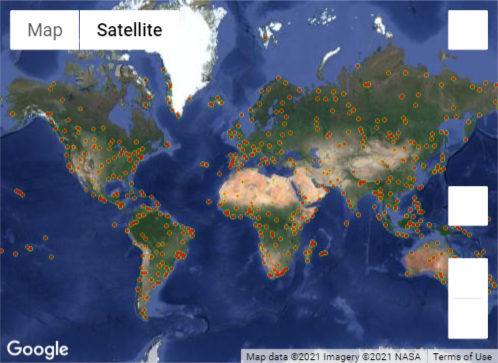

In [16]:
# Use the Lat and Lng as locations and Humidity as the weight
locations = weather_data[["Lat", "Lng"]]
humidity = weather_data["Humidity"].astype(float)

#Add Heatmap layer to map
heatmap_layer = gmaps.heatmap_layer(locations, weights=humidity,
                                   dissipating=False, max_intensity=5,
                                   point_radius=1)

fig.add_layer(heatmap_layer)

from IPython.display import Image
Image("output_data/map_weatherAPI.png")

### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

In [17]:
# New DataFrame 
ideal_weather = weather_data

# A max temperature lower than 80 degrees but higher than 70.
ideal_weather = ideal_weather.loc[(ideal_weather["Max Temp"] < 80) & (ideal_weather["Max Temp"] > 70)]

# Wind speed less than 10 mph.
ideal_weather = ideal_weather.loc[ideal_weather["Wind Speed"] < 10]

# Zero cloudiness.
ideal_weather = ideal_weather.loc[ideal_weather["Cloudiness"] == 0]

# Drop any rows with null values
ideal_weather = ideal_weather.dropna()

ideal_weather

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
70,70,ponta do sol,0,BR,1558378767,57,-20.63,-46.00,73.68,5.32
88,88,cidreira,0,BR,1558378770,66,-30.17,-50.22,76.56,5.50
138,138,morondava,0,MG,1558378780,69,-20.30,44.28,79.08,9.06
139,139,vaini,0,IN,1558378780,88,15.34,74.49,78.90,1.59
176,176,nador,0,MA,1558378499,40,35.17,-2.93,75.20,6.93
297,297,mogok,0,MM,1558378844,51,22.92,96.51,72.24,2.77
444,444,birjand,0,IR,1558378880,26,32.86,59.22,71.60,9.17


### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [18]:
#Store into variable named hotel_df.
hotel_df = ideal_weather

#Add a "Hotel Name" column to the DataFrame.
hotel_df["Hotel Name"] = ""

#Set parameters to search for hotels with 5000 meters.
parameters = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key
}

#Hit the Google Places API for each city's coordinates
for index, row in hotel_df.iterrows():
    
    # get lat, lng from df
    lat = row["Lat"]
    lng = row["Lng"]

    # change location each iteration while leaving original params in place
    parameters["location"] = f"{lat},{lng}"
    
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    # assemble url and make API request
    print(f"Retrieving Results for Index {index}: {row['City']}.")
    response = requests.get(base_url, params=parameters).json()
    
    # extract results
    results = response['results']
    
    try:
        print(f"Closest hotel is {results[0]['name']}.")
        hotel_df.loc[index, 'Hotel Name'] = results[0]['name']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("************")


Retrieving Results for Index 70: ponta do sol.
Closest hotel is Hotel Escarpas do Lago.
************
Retrieving Results for Index 88: cidreira.
Closest hotel is Hotel Castelo.
************
Retrieving Results for Index 138: morondava.
Closest hotel is La Case Bambou.
************
Retrieving Results for Index 139: vaini.
Closest hotel is Dandeli Lake County.
************
Retrieving Results for Index 176: nador.
Closest hotel is Hôtel La Giralda.
************
Retrieving Results for Index 297: mogok.
Closest hotel is MOGOK HILL HOTEL.
************
Retrieving Results for Index 444: birjand.
Closest hotel is تاکسی سرویس آرامش.
************


In [19]:
hotel_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hotel Name
70,70,ponta do sol,0,BR,1558378767,57,-20.63,-46.00,73.68,5.32,Hotel Escarpas do Lago
88,88,cidreira,0,BR,1558378770,66,-30.17,-50.22,76.56,5.50,Hotel Castelo
138,138,morondava,0,MG,1558378780,69,-20.30,44.28,79.08,9.06,La Case Bambou
139,139,vaini,0,IN,1558378780,88,15.34,74.49,78.90,1.59,Dandeli Lake County
176,176,nador,0,MA,1558378499,40,35.17,-2.93,75.20,6.93,Hôtel La Giralda
297,297,mogok,0,MM,1558378844,51,22.92,96.51,72.24,2.77,MOGOK HILL HOTEL
444,444,birjand,0,IR,1558378880,26,32.86,59.22,71.60,9.17,تاکسی سرویس آرامش


In [20]:
# NOTE: Do not change any of the code in this cell
# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]
locations = hotel_df[["Lat", "Lng"]]

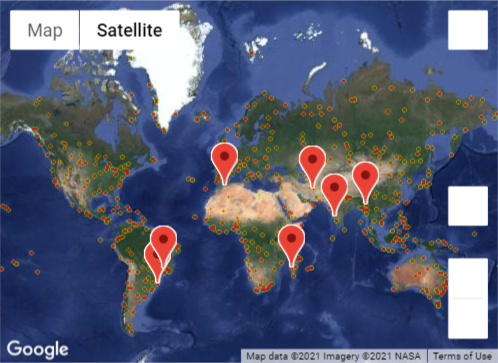

In [21]:
# Add marker layer ontop of heat map
markers = gmaps.marker_layer(locations)
fig.add_layer(markers)

# Display figure
from IPython.display import Image
Image("output_data/map_hotelMarkers.png")